In [ ]:
# This notebook is to practice to use Naive Bayes to classify Genuine/Fraud credit transtions

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# Get the credit transtion data from "../../data/creditFraud/creditCard.csv"
df = pd.read_csv("../../data/creditFraud/creditCard.csv")

# Learn the raw data first
# Learn the shape of the raw data
display(df.shape)
# First 5 lines
display(df.head(5))
# Last 5 lines
display(df.tail(5))
# Describe the raw data
display(df.describe())
# Info the raw data
display(df.info())

(284807, 31)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

None

Text(0, 0.5, '')

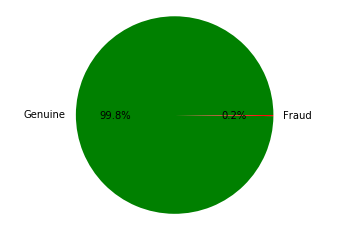

In [39]:
# Check the proportion of Genuine and Fraud transactions
plt.pie(df.Class.value_counts(), autopct="%1.1f%%", labels=["Genuine", "Fraud"], colors=["g","r"])
plt.axis("equal")
plt.ylabel("")

Text(0.5, 0, '# transactions')

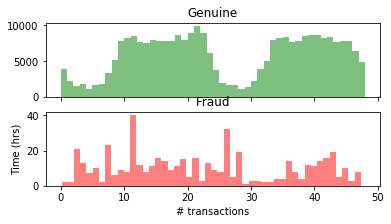

In [48]:
# Plot time to see if there is any trend
# Conver to hours unit
df["Time_Hr"] = df["Time"] / 3600
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6,3))
ax1.hist(df.Time_Hr[df.Class==0], bins=48, color="g", alpha=0.5)
ax2.hist(df.Time_Hr[df.Class==1], bins=48, color="r", alpha=0.5)
ax1.set_title("Genuine")
ax2.set_title("Fraud")
plt.ylabel("Time (hrs)")
plt.xlabel("# transactions")

# From the plot graph, we cannot see predictive power of Time_Hr to distinguish between the two classes

In [76]:
# Scale the Amount feature
from sklearn.preprocessing import StandardScaler
display()
scaler = StandardScaler()
scaler.fit(df.Amount.values.reshape(-1, 1))
df["scaled_Amount"] = scaler.transform(df.Amount.values.reshape(-1, 1))

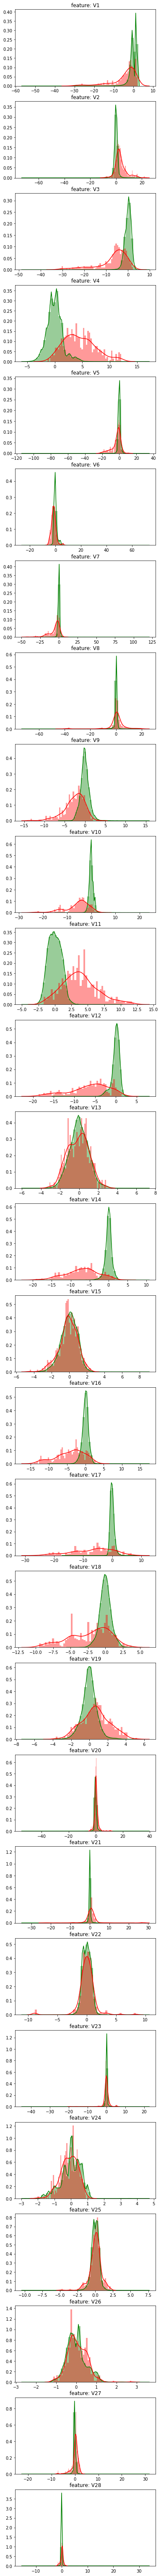

In [86]:
# Check correlations and shape of the principal features
# Features V1,  V2, ..., V28 are the principal features
import seaborn as sns
import matplotlib.gridspec as gridspec
plt.figure(figsize=(6, 28 * 4))
grids = gridspec.GridSpec(28, 1)
for i, col in enumerate(df.iloc[:, 1:29].columns):
    ax = plt.subplot(grids[i, 0])
    sns.distplot(df[col][df.Class==0], bins=50, color="g")
    sns.distplot(df[col][df.Class==1], bins=50, color="r")
    ax.set_xlabel("")
    ax.set_title(f"feature: {col}")
plt.show()
# From the plot image, we can see some of the features can be used to classify the Genuine and Fraud, some are not.
# We can drop the unrelated features when fitting to avoid overfit 

In [98]:
from sklearn.model_selection import train_test_split
# This function is used to split the train, test data
drop_list = ["Time", "Amount"]
def split_data(df, drop_list):
    dropped_df = df.drop(drop_list, axis=1)
    X = dropped_df.drop("Class", axis=1).values
    y = dropped_df.Class.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = split_data(df, drop_list)
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(227845, 30)

(227845,)

(56962, 30)

(56962,)

In [112]:
from sklearn.metrics import confusion_matrix
# This function is used to get the predications based on the input Classifier
def get_predications(clf, X_train, y_train, X_test):
    clf = clf
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_prob = clf.predict_proba(X_test)
    return y_pred, y_pred_prob

In [122]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
# This function is used to calculate the score
def print_scores(y_test, y_pred):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred, average=None)) # average = None provides the score for all labels
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))

In [123]:
# Use Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
drop_list = ["Time", "Amount"]
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predications(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test, y_pred)

test-set confusion matrix:
 [[55535  1329]
 [   15    83]]
recall score:  0.8469387755102041
precision score:  [0.99972997 0.05878187]
f1 score:  0.10993377483443707
accuracy score:  0.9764053228468101


In [124]:
# This part is used to understand the scores
y =      [1, 1, 0, 1, 1, 0, 1, 0, 1, 1]
y_pred = [0, 1, 1, 1, 0, 0, 0, 1, 1, 1]
print_scores(y, y_pred)

test-set confusion matrix:
 [[1 2]
 [3 4]]
recall score:  0.5714285714285714
precision score:  [0.25       0.66666667]
f1 score:  0.6153846153846153
accuracy score:  0.5
